In [1]:
from typing import Optional, List
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

idf_arr = np.array([4.11351531, 4.11351531, 3.42036813, 2.40876722, 3.42036813,
       2.09861229, 2.86075234, 1.97344915, 3.7080502 , 3.01490302,
       2.60943791, 3.42036813, 3.01490302, 3.7080502 , 1.58778666,
       1.81093022, 2.86075234, 2.72722095, 2.72722095, 3.42036813,
       2.72722095, 3.19722458, 2.72722095, 3.19722458, 3.19722458,
       2.16760516, 3.7080502 , 3.19722458, 2.32175584, 3.42036813,
       2.60943791, 3.01490302, 3.19722458, 4.11351531, 3.42036813,
       3.42036813, 4.11351531, 1.25131443, 3.01490302, 3.01490302,
       3.7080502 , 3.01490302, 3.19722458, 3.01490302, 3.19722458,
       3.42036813, 2.60943791, 3.19722458, 4.11351531, 4.11351531,
       2.86075234, 2.24171313, 4.11351531, 3.01490302, 3.7080502 ,
       2.16760516, 2.72722095, 2.24171313, 3.01490302, 3.19722458,
       3.01490302, 2.5040774 , 4.11351531, 4.11351531, 3.19722458,
       3.42036813, 2.60943791, 2.5040774 , 2.5040774 , 2.24171313,
       3.19722458, 3.01490302, 3.42036813, 3.7080502 , 2.86075234,
       2.86075234, 3.42036813, 4.11351531, 2.40876722, 2.5040774 ,
       2.86075234, 2.72722095, 2.5040774 , 2.72722095, 2.24171313,
       3.42036813, 3.7080502 , 2.86075234, 2.16760516, 2.5040774 ,
       2.09861229, 2.60943791, 2.32175584, 3.42036813, 3.42036813,
       3.7080502 , 4.11351531, 4.11351531, 3.42036813, 2.03407377,
       2.09861229, 2.09861229, 2.72722095, 3.01490302, 2.09861229,
       3.7080502 , 4.11351531, 3.42036813, 2.32175584, 2.72722095,
       2.5040774 , 3.19722458, 3.42036813, 3.42036813, 2.40876722,
       2.40876722, 2.86075234, 3.19722458, 2.32175584, 2.16760516,
       4.11351531, 3.42036813, 2.60943791, 2.24171313, 3.7080502 ,
       2.86075234, 3.19722458, 3.19722458, 3.7080502 , 2.24171313,
       3.19722458, 2.5040774 , 2.60943791, 2.09861229, 2.40876722,
       2.86075234, 3.19722458, 1.91629073, 3.42036813, 4.11351531,
       4.11351531, 4.11351531, 2.32175584, 3.19722458, 3.19722458,
       2.86075234, 2.32175584, 2.5040774 , 1.91629073, 3.19722458,
       3.01490302, 1.97344915, 2.72722095, 3.19722458, 3.01490302,
       1.86222351, 2.86075234, 2.32175584, 3.19722458, 3.01490302,
       2.60943791, 3.19722458, 3.19722458, 2.86075234, 2.86075234,
       2.16760516, 4.11351531, 4.11351531, 4.11351531, 3.7080502 ,
       4.11351531, 2.86075234, 3.19722458, 2.86075234, 3.01490302,
       2.5040774 , 2.72722095, 3.19722458, 2.24171313, 2.72722095,
       2.09861229, 2.72722095, 3.7080502 , 3.19722458, 2.03407377,
       2.60943791, 2.72722095, 3.42036813, 3.01490302, 3.01490302,
       2.86075234, 2.40876722, 3.19722458, 3.42036813, 2.86075234,
       3.19722458, 2.86075234, 3.19722458, 3.01490302, 2.72722095,
       2.40876722, 2.60943791, 3.01490302, 2.32175584, 2.86075234,
       3.01490302, 2.86075234, 3.42036813, 3.42036813, 3.7080502 ,
       3.19722458, 3.19722458, 4.11351531, 4.11351531, 3.42036813,
       3.19722458, 2.72722095, 2.24171313, 4.11351531, 3.19722458,
       2.86075234, 2.72722095, 3.01490302, 3.42036813, 2.86075234,
       2.60943791, 3.7080502 , 4.11351531, 3.01490302, 2.60943791,
       3.42036813, 3.7080502 , 2.86075234, 3.19722458, 2.86075234,
       2.86075234, 2.5040774 , 4.11351531, 2.24171313, 2.5040774 ,
       3.01490302, 3.19722458, 3.01490302, 1.97344915, 3.7080502 ,
       2.40876722, 2.86075234, 2.5040774 , 4.11351531, 2.86075234,
       3.19722458, 2.5040774 , 3.19722458, 3.01490302, 3.19722458,
       2.5040774 , 3.19722458, 3.19722458, 3.19722458, 3.42036813,
       2.72722095, 3.7080502 , 3.7080502 , 3.19722458, 2.86075234,
       3.19722458, 2.60943791, 2.72722095, 2.72722095, 2.5040774 ,
       4.11351531, 3.7080502 , 4.11351531, 3.7080502 , 3.19722458,
       3.42036813, 3.01490302, 4.11351531, 3.7080502 , 3.01490302,
       2.72722095, 2.72722095, 3.42036813, 3.42036813, 3.01490302,
       3.19722458, 3.01490302, 2.86075234, 2.09861229, 4.11351531,
       3.19722458, 3.42036813, 3.01490302, 3.19722458, 3.42036813,
       3.01490302, 3.01490302, 3.19722458, 4.11351531, 2.60943791])

arr = np.array([[-0.17616419,  0.25184451,  0.10956388,  0.4713037 ,  0.10091853,
         0.38508883,  0.11149967, -0.37199297,  0.11204124, -0.18274464,
        -0.16612395, -0.12508067, -0.25202607,  0.13441702,  0.39263639,
         0.44674992,  0.15906723, -0.23406071, -0.34931656, -0.13188969,
         0.14151582,  0.10759265,  0.15290703,  0.11482879,  0.09844128,
        -0.11086888,  0.23719094,  0.14654281,  0.24114272,  0.10891086,
         0.20325674,  0.12213434,  0.12845204, -0.10516758, -0.14520871,
        -0.16999911, -0.14022344,  0.20722283, -0.19564362, -0.10140376,
         0.12562285, -0.10996555,  0.10824582,  0.10500939, -0.156568  ,
        -0.30374737,  0.17650849,  0.12100873,  0.17462842,  0.11388822,
         0.20117492,  0.23513248,  0.23340681,  0.12148101,  0.12936362,
        -0.55708317, -0.13746362, -0.31524241,  0.11759252,  0.29227104,
         0.15364249, -0.10655443, -0.2101558 ,  0.19930438, -0.11255927,
         0.1134726 , -0.10286923, -0.13315068, -0.21171701, -0.14432429,
         0.2375386 , -0.11728136, -0.2399708 , -0.11097342, -0.17745153,
        -0.15352788, -0.11238804, -0.2473069 ,  0.21342934,  0.12632002,
         0.11999952, -0.111944  ,  0.10112928, -0.12948252, -0.24883262,
         0.11712285,  0.13145173, -0.15415199,  0.17475744, -0.13285929,
        -0.23759217, -0.17471453, -0.30716215,  0.10467729,  0.10805896,
         0.17813877,  0.12816371,  0.10253097, -0.30491755,  0.11334224,
        -0.77843592, -0.64167474, -0.13161495, -0.20157592, -0.29874274,
        -0.13947847, -0.23425397, -0.14315689, -0.26656713, -0.11920691,
        -0.1241285 , -0.18647948,  0.0990422 ,  0.1373296 ,  0.18374108,
         0.27061536,  0.12789099, -0.16141392,  0.47914152,  0.43149993,
         0.15391427,  0.11231841, -0.19964409,  0.1114138 , -0.141689  ,
        -0.14333711, -0.16648801, -0.17229183, -0.1243742 ,  0.11047163,
         0.09752872,  0.15326852,  0.13863462, -0.2487422 , -0.18890317,
        -0.13932005,  0.11096955, -0.48088249,  0.11071027,  0.13337532,
         0.18506835, -0.15624259,  0.22440373,  0.13467167, -0.21651764,
         0.23643836, -0.33723917,  0.19655321,  0.16462753, -0.10897936,
        -0.14145896, -0.16894869, -0.11188437,  0.1533201 , -0.23919935,
        -0.4087027 ,  0.15146356,  0.14760053,  0.17643616,  0.27770273,
         0.21575556, -0.12067881,  0.10224705, -0.17318595, -0.10933957,
        -0.33538079,  0.14661805,  0.1710544 ,  0.12218171,  0.23279837,
         0.27694443,  0.11446977, -0.12697575,  0.16535113,  0.12164195,
         0.15392982,  0.15453679, -0.14763744, -0.15284582, -0.10862744,
        -0.26465286, -0.19257836,  0.1280675 ,  0.09928339, -0.14976616,
         0.22233459,  0.14211426,  0.11433346,  0.11491651,  0.1196377 ,
         0.13989997, -0.15817379, -0.10575369, -0.09902006, -0.14286841,
        -0.14682695, -0.21419259,  0.09774712, -0.13190352,  0.11526622,
         0.10141417, -0.12268279, -0.14094699,  0.1847351 ,  0.15353893,
         0.11177478,  0.16201527,  0.1034913 ,  0.12462394, -0.1122975 ,
         0.11520504,  0.12969276,  0.1704229 , -0.16732426, -0.12274437,
        -0.11492608, -0.15026164, -0.11264745,  0.12763093,  0.12901612,
         0.10160405,  0.13349551,  0.10594957, -0.18292762, -0.12686178,
        -0.17832531, -0.10927417, -0.15091874, -0.11452021,  0.15015285,
        -0.15122546, -0.0999858 ,  0.14422565, -0.10879813,  0.15538204,
         0.1396682 ,  0.17652489,  0.1417113 ,  0.16599443,  0.26063435,
         0.21929836,  0.14791101,  0.15144414,  0.46046645, -0.11338628,
         0.23093317,  0.15045512,  0.12066558, -0.14789794, -0.13894365,
        -0.12832208,  0.20347523,  0.10689883, -0.1078652 , -0.11587443,
        -0.15761339, -0.11568334,  0.09847732,  0.12511261,  0.14678159,
         0.1554473 , -0.16490605, -0.12104239,  0.11658529, -0.16176217,
        -0.11625368, -0.14343726, -0.16871334, -0.31853452,  0.41623029,
         0.23394292, -0.10811198,  0.14130376,  0.28793481, -0.15448115,
        -0.10642323,  0.12183988,  0.15315711, -0.20480618,  0.14717644,
         0.2581974 , -0.16628787, -0.10229645,  0.10556343, -0.28685152,
         0.13285317, -0.125041  ,  0.10394006, -0.14724562,  0.12816371,
        -0.10879813, -0.11111904, -0.21870313, -0.27389577, -0.11753673,
        -0.1450246 ,  0.17040641,  0.14013445,  0.13337532,  0.10662335]])

dct = {'багажные':0, 
'бамборо':1, 'башне':2, 'башни':3, 'башню':4, 'башня':5, 'башнями':6, 'безопасности':7, 'белой':8, 
'блокировка':9, 'блокировки':10, 'большинство':11, 'брама':12, 'бург':13, 'века':14, 'веке':15, 'веков':16, 
'взлома':17, 'взломать':18, 'взлому':19, 'вид':20, 'владельцем':21, 'владение':22, 'владения':23, 'внешние':24, 
'внутри':25, 'воде':26, 'водой':27, 'войны':28, 'войско':29, 'ворота':30, 'воротами':31, 'впоследствии':32, 
'врезного':33, 'врезной':34, 'врезные':35, 'врезных':36, 'время':37, 'вставлен':38, 'вставляется':39, 'выборгский':40, 
'высоким':41, 'высота':42, 'высотой':43, 'выход':44, 'выхода':45, 'гарнизон':46, 'герцогства':47, 'гимарайнш':48, 
'горей':49, 'город':50, 'города':51, 'грааля':52, 'графом':53, 'дамы':54, 'двери':55, 'дверной':56, 
'дверь':57, 'двор':58, 'дворец':59, 'дворца':60, 'двух':61, 'детей':62, 'джерси':63, 'длины':64, 
'донжоном':65, 'достаточно':66, 'доступ':67, 'доступа':68, 'других':69, 'зал':70, 'замками':71, 'запирание':72, 
'запирать':73, 'засов':74, 'защелки':75, 'защелку':76, 'защитный':77, 'здание':78, 'земли':79, 'значение':80, 
'зрения':81, 'именно':82, 'иметь':83, 'имеют':84, 'императора':85, 'использовали':86, 'использовались':87, 'использовался':88, 
'использования':89, 'используется':90, 'используют':91, 'используются':92, 'истории':93, 'камень':94, 'карла':95, 'карлштейн':96, 
'карлштейна':97, 'карты':98, 'качестве':99, 'ключ':100, 'ключа':101, 'ключей':102, 'ключи':103, 'ключом':104, 
'кодом':105, 'колеса':106, 'компания':107, 'конструкции':108, 'конструкцию':109, 'конструкция':110, 'контроля':111, 'королевские':112, 
'королевства':113, 'король':114, 'короля':115, 'королём':116, 'корпуса':117, 'крепости':118, 'крепость':119, 'крестоносцев':120, 
'купил':121, 'легко':122, 'лет':123, 'магнитной':124, 'магнитные':125, 'магнитным':126, 'магнитных':127, 'мастерключей':128, 
'месте':129, 'местности':130, 'место':131, 'метров':132, 'механизм':133, 'механизма':134, 'механизмы':135, 'мира':136, 
'могут':137, 'монастыря':138, 'монсальват':139, 'монторгёй':140, 'мс':141, 'музей':142, 'музея':143, 'набор':144, 
'название':145, 'например':146, 'находился':147, 'находится':148, 'небольшой':149, 'невозможно':150, 'некоторые':151, 'некоторых':152, 
'оборонительное':153, 'оборудования':154, 'обычно':155, 'одна':156, 'около':157, 'ордена':158, 'острова':159, 'острове':160, 
'отверстия':161, 'отдельные':162, 'открывать':163, 'открытия':164, 'открыть':165, 'охота':166, 'охотничьи':167, 'охотничьих':168, 
'охоты':169, 'пальфи':170, 'памятников':171, 'патент':172, 'первом':173, 'перешёл':174, 'период':175, 'плане':176, 
'пластин':177, 'позволяет':178, 'пока':179, 'помощью':180, 'пор':181, 'португалии':182, 'посещения':183, 'поскольку':184, 
'построен':185, 'построена':186, 'построенная':187, 'построено':188, 'построил':189, 'построили':190, 'правило':191, 'правильно':192, 
'предлагают':193, 'предназначены':194, 'предотвращает':195, 'предотвращения':196, 'приобрёл':197, 'производители':198, 'работ':199, 'работы':200, 
'различных':201, 'разной':202, 'расположен':203, 'расположена':204, 'резиденцию':205, 'реки':206, 'рекой':207, 'реконструкция':208, 
'ригель':209, 'римской':210, 'рода':211, 'розенбург':212, 'рулевого':213, 'ручек':214, 'ручки':215, 'ручкой':216, 
'ряд':217, 'свидетельств':218, 'своё':219, 'связи':220, 'святого':221, 'северной':222, 'сейфа':223, 'система':224, 
'системы':225, 'скважины':226, 'слот':227, 'случае':228, 'смерти':229, 'сможет':230, 'снять':231, 'собственность':232, 
'соединенных':233, 'сооружение':234, 'сооружения':235, 'сохранились':236, 'средненский':237, 'стал':238, 'стен':239, 'стена':240, 
'стене':241, 'стеной':242, 'стены':243, 'стерлингов':244, 'стиле':245, 'строительства':246, 'строительство':247, 'сувальда':248, 
'сша':249, 'термин':250, 'территории':251, 'толщина':252, 'точки':253, 'требует':254, 'требуется':255, 'тумблерный':256, 
'тюрьма':257, 'удалось':258, 'укреплений':259, 'укрепления':260, 'умные':261, 'умный':262, 'упадок':263, 'управления':264, 
'управлять':265, 'уровнем':266, 'устройства':267, 'устройство':268, 'фон':269, 'фондерн':270, 'фунтов':271, 'хаапсалу':272, 
'хайме':273, 'хоббс':274, 'хоббса':275, 'холма':276, 'холтон':277, 'хранилища':278, 'церкви':279, 'церковь':280, 
'цилиндр':281, 'цилиндровые':282, 'цитадель':283, 'чабба':284, 'часовни':285, 'частей':286, 'частности':287, 'часто':288, 
'чехии':289, 'штатах':290, 'штифта':291, 'штифтов':292, 'штифты':293, 'электрические':294, 'электронные':295, 'этажа':296, 
'этаже':297, 'эхтра':298, 'южной':299, }

int_ = np.array([0.06018573])

stop_words = ['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 
              'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 
              'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 
              'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 
              'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 
              'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 
              'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 
              'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 
              'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 
              'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 
              'свою', 'этой', 'перед', 'иногда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 
              'конечно', 'всю', 'между', 'её', 'нем', 'нём', 'однако', 'эта', 'де', 'очень', 'ещё', 'обе',  'либо', 'замок',
              'замка', 'замков', 'замком', 'замку', 'замках', 'замки', 'тех', 'год', 'годов', 'году', 'года', 'годах', 'также',
              'который', 'замке', 'это', 'которых', 'которая', 'которые', 'хотя', 'многие']#, '']
 
class ZamokClassifier:
    def __init__(self, ddd=False, load_path: Optional[str] = None, mx=150, good_words:List[str] = []) -> None:
        if load_path:
            with bz2.BZ2File(load_path+'.vectorizer.pbz2', 'r') as fin:
                self.vectorizer = pickle.load(fin)
            with bz2.BZ2File(load_path+'.model.pbz2', 'r') as fin:
                self.log_model = pickle.load(fin)
            # with open(load_path+'.vectorizer.pk', 'rb') as fin:
            #     self.vectorizer = pickle.load(fin)
            # with open(load_path+'.model.pk', 'rb') as fin:
            #     self.log_model = pickle.load(fin)
        else:
            if ddd:
                self.vectorizer = TfidfVectorizer(max_features=mx)
                self.vectorizer.vocabulary_ = dct
                self.vectorizer.idf_ = idf_arr
                self.log_model = LogisticRegression()
                self.log_model.coef_ = arr
                self.log_model.intercept_ = int_
                self.log_model.classes_ = np.array([0,1])
            else:
                if good_words:
                    self.vectorizer = TfidfVectorizer(max_features=mx, vocabulary=good_words)
                    self.log_model = LogisticRegression()
                else:
                    self.vectorizer = TfidfVectorizer(max_features=mx)
                    self.log_model = LogisticRegression()
    @classmethod        
    def preproc(clf, texts):
        bad = '1234567890()!@#$%^&*,./abcdefghijklmnopqrstuvwxyz-—_+=«»\n:;[]–’…'+"'"+'"'
        clear_, total = [], []
        for text in texts:
            text = text.lower()
            for letter in text:
                if letter in bad:
                    text = text.replace(letter, '')
                text = text.replace('  ', ' ')
                text = text. replace(' г ', 'город')
            clear_.append(text)
        for text in clear_:
            tmp = []
            for word in text.split():
                if word not in stop_words:
                    tmp.append(word)
            total.append(' '.join(tmp))
        return total
            
    def train(self, texts1: List[str], texts2: List[str]) -> None:
        # castles_tokens = [token for text in texts1 for token in text.split()]
        # locks_tokens = [token for text in texts2 for token in text.split()]
        texts1, texts2 = self.preproc(texts1), self.preproc(texts2)
        self.vectorizer.fit(texts1+texts2)
        x_castles = self.vectorizer.transform(texts1).toarray()
        x_locks = self.vectorizer.transform(texts2).toarray()
        X = np.concatenate([x_castles, x_locks], axis=0)
        y = np.concatenate([[1]*len(x_castles), [0]*len(x_locks)])
        self.log_model.fit(X, y)
    
    def save(self, path: str) -> None:
        # with open(path+'.vectorizer.pk', 'wb') as fin:
        #     pickle.dump(self.vectorizer, fin)
        # with open(path+'.model.pk', 'wb') as fin:
        #     pickle.dump(self.log_model, fin)
        with bz2.BZ2File(path+'.vectorizer.pbz2', 'w') as fin:
            pickle.dump(self.vectorizer, fin)
        with bz2.BZ2File(path+'.model.pbz2', 'w') as fin:
            pickle.dump(self.log_model, fin)
        
    
    def predict(self, text: str) -> str:
        emb = self.vectorizer.transform(self.preproc([text]))
        class_ = self.log_model.predict(emb)
        if class_:
            ans = 'YES'
        else:
            ans = 'NO'
        return ans
    def predict_proba(self, text: str) -> np.ndarray:
        emb = self.vectorizer.transform(self.preproc([text]))
        classes_proba_ = self.log_model.predict_proba(emb)
        return classes_proba_
    
# i = int(input())
# text = input().split()
# string = ''
# for num in text:
#     string += chr(int(num))
# model = ZamokClassifier(ddd=True, mx = len(dct))
# print(model.predict(string))

In [2]:
model = ZamokClassifier(mx=1000)

In [3]:
import os
import codecs
castles = []
for filename in os.listdir("castles/"):
    if filename[::-1][:4] == 'txt.':
        fileObj = codecs.open("castles/"+filename, 'r', "utf_8_sig")
        txt = fileObj.readlines()
        txt = [text for text in txt if len(ZamokClassifier.preproc([text])[0].split()) > 4]
        txt = ' '.join(txt)
        castles.append(txt)
        fileObj.close()
        
locks = []
for filename in os.listdir("locks/"):
    if filename[::-1][:4] == 'txt.':
        fileObj = codecs.open("locks/"+filename, 'r', "utf_8_sig")
        txt = fileObj.readlines()
        txt = [text for text in txt if len(ZamokClassifier.preproc([text])[0].split()) > 4]
        txt = ' '.join(txt)
        locks.append(txt)
        fileObj.close()

In [4]:
model.train(castles, locks)

In [5]:
# print('idf_arr = np.', end='')
# __import__('pprint').pprint(model.vectorizer.idf_)

# print('\narr = np.', end='')
# __import__('pprint').pprint(model.log_model.coef_)

# print('\ndct = ', end='')
# print("{", end='')
# for ind, item in enumerate(model.vectorizer.vocabulary_.items()):
#     print("'"+item[0]+"':"+str(item[1])+",", end = ' ')
#     if not ind % 8:
#         print('')
# print("}", end='')

# print(f'\n\nint_ = np.array({model.log_model.intercept_})')

In [6]:
print(np.sum(np.abs(model.log_model.coef_[0])>0.0867))

300


In [7]:
good_words = []
dct_ = model.vectorizer.vocabulary_
dct_rev_ = {v: k for k, v in dct_.items()}
for ind, coef in enumerate(model.log_model.coef_[0]):
    if abs(coef) > 0.0867:
        good_words.append(dct_rev_[ind])

In [8]:
model_fixed = ZamokClassifier(mx=len(good_words), good_words=good_words)

In [9]:
model_fixed.train(castles, locks)

In [10]:
# print('idf_arr = np.', end='')
# __import__('pprint').pprint(model_fixed.vectorizer.idf_)

# print('\narr = np.', end='')
# __import__('pprint').pprint(model_fixed.log_model.coef_)

# print('\ndct = ', end='')
# print("{", end='')
# for ind, item in enumerate(model_fixed.vectorizer.vocabulary_.items()):
#     print("'"+item[0]+"':"+str(item[1])+",", end = ' ')
#     if not ind % 8:
#         print('')
# print("}", end='')

# print(f'\n\nint_ = np.array({model_fixed.log_model.intercept_})')

In [11]:
# print("{", end='')
# for ind, item in enumerate(model.vectorizer.vocabulary_.items()):
#     print("'"+item[0]+"':"+str(item[1])+",", end = ' ')
#     if not ind % 8:
#         print('')
# print("}", end='')

In [12]:
# model = ZamokClassifier(mx=600)
# model.train(castles, locks)
# model.save('test_pbz')

In [13]:
# model1 = ZamokClassifier(load_path = 'test_pbz')

In [14]:
# with bz2.BZ2File('test_pbz.vectorizer.pbz2', 'r') as fin:
#     txt = fin.read()

In [15]:
# with bz2.BZ2File('test_pbz.model.pbz2', 'r') as fin:
#     txt1 = fin.read()

In [16]:
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

  0%|          | 0/20 [00:00<?, ?it/s]

100 1.0


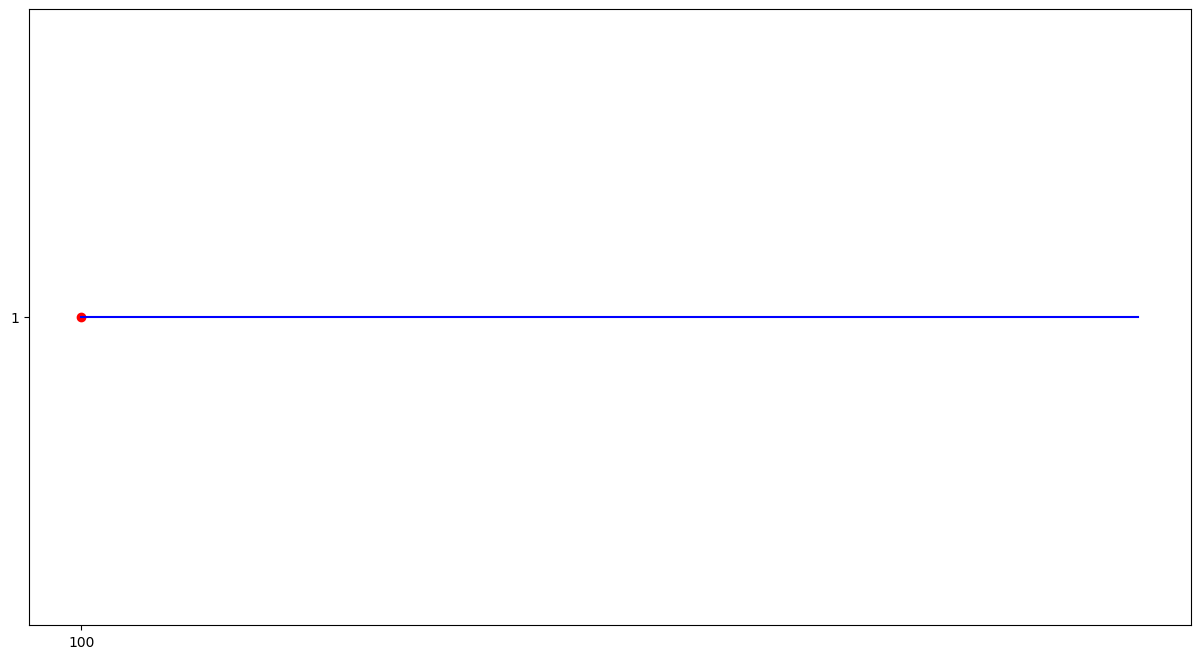

In [17]:
xx, yy = [], []
st1, st2 = set(), set()
for m in tqdm(range(100, 600, 25)):
    i = 0
    model = ZamokClassifier(mx=m)
    model.train(castles, locks)
    for x in locks:
        if model.predict(x) == "NO":
            i+=1
    for x in castles:
        if model.predict(x) == "YES":
            i+=1
    # print(i/(len(castles)+len(locks)), m)
    yy.append(i/(len(castles)+len(locks)))
    xx.append(m)
plt.figure(figsize=(15, 8))
plt.plot(xx, yy, c='blue')
plt.scatter([xx[yy.index(max(yy))]], [max(yy)], c='r')
# plt.plot([0,m], [max(yy), max(yy)])
plt.yticks([max(yy)])
plt.xticks([xx[yy.index(max(yy))]])
# for line in range(len(xx)):
#     plt.plot([xx[line], xx[line]], [yy[line], 0], c='blue')
plt.savefig("plot.pdf")
print(xx[yy.index(max(yy))], max(yy))

In [18]:
# xx, yy = [], []
# st1, st2 = set(), set()
# for m in tqdm(range(1, 100, 10)):
#     i = 0
#     model = ZamokClassifier(mx=m)
#     model.train(castles, locks)
#     for x in locks:
#         if model.predict(x) == "NO":
#             i+=1
#     for x in castles:
#         if model.predict(x) == "YES":
#             i+=1
#     # print(i/(len(castles)+len(locks)), m)
#     yy.append(i/(len(castles)+len(locks)))
#     xx.append(m)
# plt.figure(figsize=(15, 8))
# plt.plot(xx, yy, c='blue')
# plt.scatter([xx[yy.index(max(yy))]], [max(yy)], c='r')
# # plt.plot([0,m], [max(yy), max(yy)])
# plt.yticks([max(yy)])
# plt.xticks([xx[yy.index(max(yy))]])
# # for line in range(len(xx)):
# #     plt.plot([xx[line], xx[line]], [yy[line], 0], c='blue')
# plt.savefig("plot.pdf")
# print(xx[yy.index(max(yy))], max(yy))

In [19]:
err_castles, err_locks = [], []

for ind, text in enumerate(castles):
    if model.predict(text) != "YES":
        err_castles.append(ind)

for ind, text in enumerate(locks):
    if model.predict(text) != "NO":
        err_locks.append(ind)

In [20]:
for ind in err_locks:
    print("-"*20)
    print([locks[ind]])
    print(model.predict_proba(locks[ind]))
    dct_rev = {v: k for k, v in model.vectorizer.vocabulary_.items()}
    emb = model.vectorizer.transform(model.preproc([locks[ind]])).toarray()[0]
    print(emb.shape)
    words = [dct_rev[ind] for ind, score in enumerate(emb) if score]
    print(words)
    print("-"*20, '\n'*3)